In [23]:
import pandas as pd

# Load your DataFrame
df = pd.read_csv('D:/project 3/project_3_data_cleaned.csv')

# Drop the 'price' column from the DataFrame to create the feature set X
X = df.drop(columns=['price'])

# Define the target variable y as the 'price' column
y = df['price']


In [25]:
print(X.dtypes)


Fule_type               object
Body_type               object
km                       int64
ownerNo                  int64
Company                 object
model                   object
modelYear                int64
centralVariantId         int64
variantName             object
Registration_Year      float64
Insurance               object
Seats                    int64
Kms_Driven               int64
RTO                     object
Ownership               object
Engine_CC                int64
Transmission            object
Year_of_Manufacture      int64
Max_Power              float64
Colur                   object
Number_of_Cylinder       int64
dtype: object


In [27]:
# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Check if encoding is done correctly
print(X_encoded.head())


       km  ownerNo  modelYear  centralVariantId  Registration_Year  Seats  \
0  120000        3       2015              3979             2015.0      5   
1   32706        2       2018              6087             2018.0      5   
2   17794        1       2014              1867             2014.0      5   
3   60000        1       2015              4277             2015.0      5   
4   20000        1       2020              5931             2020.0      5   

   Kms_Driven  Engine_CC  Year_of_Manufacture  Max_Power  ...  Colur_b red  \
0      120000        998                 2015      23.10  ...        False   
1       32706       1497                 2018      17.00  ...        False   
2       17794       1197                 2014      19.10  ...        False   
3       60000       1248                 2015      23.65  ...        False   
4       20000       1956                 2020      17.10  ...        False   

   Colur_beige  Colur_c bronze  Colur_c brown  Colur_chill  Colur_g 

In [29]:

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_encoded.loc[X_train.index])
X_test_scaled = scaler.transform(X_encoded.loc[X_test.index])


Mean Squared Error: 5.165153988393758e+38
R-squared: -5.534793411481883e+26


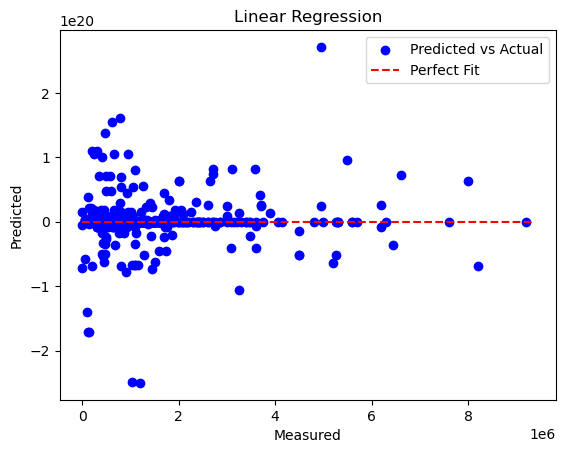

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load data
d = pd.read_csv("D:/project 3/project_3_data_cleaned.csv")

# Prepare features and target variable
X = d.drop(columns=['price'])
Y = d['price']

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Encode categorical features
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align columns in test set with training set
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Create and train the model
m = LinearRegression()
m.fit(X_train_scaled, Y_train)

# Make predictions
Y_pred = m.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plotting
plt.scatter(Y_test, Y_pred, color='blue', label='Predicted vs Actual')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title('Linear Regression')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.legend()
plt.show()


Mean Squared Error (KNN Regression): 626894605138.0659
R-squared (KNN Regression): 0.3282422677023208


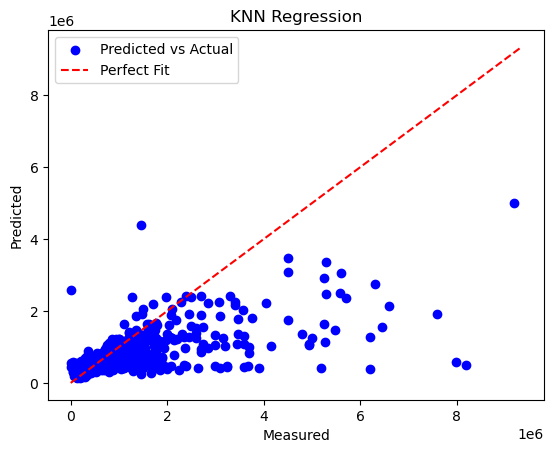

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load data
d = pd.read_csv("D:/project 3/project_3_data_cleaned.csv")

# Prepare features and target variable
X = d.drop(columns=['price'])
Y = d['price']

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Encode categorical features
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align columns in test set with training set
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Create and train the KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn_model.fit(X_train_scaled, Y_train)

# Make predictions
Y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("Mean Squared Error (KNN Regression):", mse)
print("R-squared (KNN Regression):", r2)

# Plotting
plt.scatter(Y_test, Y_pred, color='blue', label='Predicted vs Actual')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title('KNN Regression')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.legend()
plt.show()


Mean Squared Error (Decision Tree Regression): 282164450976.6703
R-squared (Decision Tree Regression): 0.6976427135126446


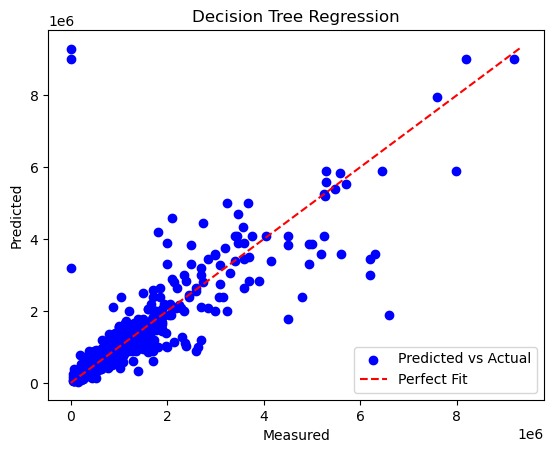

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load data
d = pd.read_csv("D:/project 3/project_3_data_cleaned.csv")

# Prepare features and target variable
X = d.drop(columns=['price'])
Y = d['price']

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Encode categorical features
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align columns in test set with training set
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Scale features (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Create and train the Decision Tree Regression model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, Y_train)

# Make predictions
Y_pred = tree_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("Mean Squared Error (Decision Tree Regression):", mse)
print("R-squared (Decision Tree Regression):", r2)

# Plotting
plt.scatter(Y_test, Y_pred, color='blue', label='Predicted vs Actual')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title('Decision Tree Regression')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.legend()
plt.show()


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from scipy.stats import randint

# Load data
df = pd.read_csv("D:/project 3/final/final_file_project_3.csv")

# Prepare features and target variable
selected_columns = ['Fule_type', 'Body_type', 'Company', 'model', 'Registration_Year', 'Kms_Driven', 'Transmission', 'City', 'Ownership', 'Seats', 'Insurance']
X = df[selected_columns].copy()
Y = df['price']

# Separate numeric and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(exclude=['number']).columns

# Impute missing values for numeric columns using .loc
X.loc[:, numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())

# Impute missing values for categorical columns using .loc
for col in categorical_cols:
    X.loc[:, col] = X[col].fillna(X[col].mode()[0])

# Encode categorical features
X_encoded = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning for Random Forest Regressor
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': [1.0, 'sqrt', 'log2']  # Set max_features to 1.0 to avoid FutureWarning
}

rf_model = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search.fit(X_train_scaled, Y_train)

# Best model
best_rf_model = random_search.best_estimator_

# Make predictions
Y_pred = best_rf_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("Mean Squared Error (Random Forest Regression):", mse)
print("R-squared (Random Forest Regression):", r2)

# Additional evaluation: Cross-validation scores
cv_scores = cross_val_score(best_rf_model, X_encoded, Y, cv=5, scoring='neg_mean_squared_error')
print("Mean Cross-Validation MSE:", -cv_scores.mean())

# Save the model and other necessary files
joblib.dump(best_rf_model, 'random_forest_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X_train.columns, 'X_train_encoded_columns.pkl')

Mean Squared Error (Random Forest Regression): 135711826886.437
R-squared (Random Forest Regression): 0.8552370474621984
Mean Cross-Validation MSE: 185419453750.08005


['X_train_encoded_columns.pkl']